# Classification en k - moyennes

Ce type de classification non supervisée est un algorithme de machine learning très utile pour classifier rapidement des bases de données volumineuses. En effet, plutôt que de calculer les distances de l'ensemble des points entre eux, il va procéder ainsi :  
- Il initialise un nombre de centroïdes (de classes) qu'il va placer dans l'espace des points de manière aléatoire.   
- Il associe ensuite à chaque centroïde les points qui lui sont les plus proches, créant ainsi autant de classes que de centroïdes.  
- Il déplace ensuite les centroïdes au centre de gravité de leur classe.  
- Il répète les étapes précédentes jusqu'à la convergence du modèle.  

Comme une illustration vaut mieux que trop d'explications, on peut regarder sur cette vidéo comment fonctionne l'algorithme : 


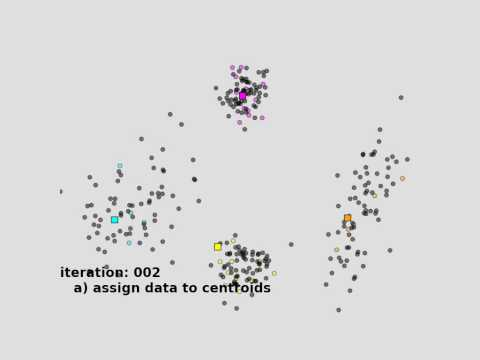

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('5I3Ei69I40s', width=800, height=300)


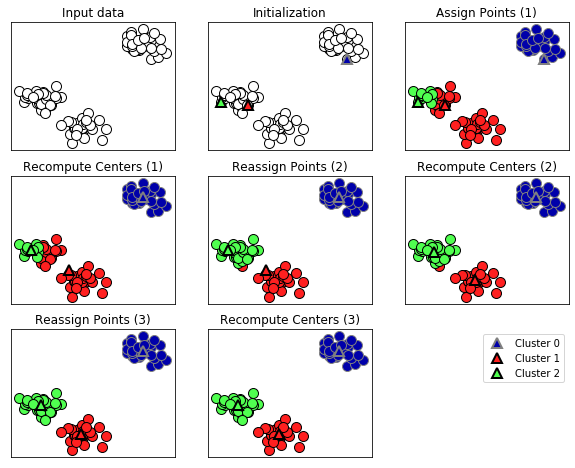

In [25]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

Pour un nombre de classes donné, cet algorithme cherche à __minimiser la variance intra-classe__ et à __maximiser la variance inter-classes__. 

## k-means avec Python  

Sur Python, on va utiliser la fonction Kmeans de scikit-learn. Elle propose de nombreux paramètres mais le seul qui nous intéresse pour l'instant c'est `n_clusters`, le nombre de classes voulu. On ajuste notre modèle sur nos données avec `.fit` et on obtient nos classes avec `. predict`. 

__À vous!__  
- Faites tourner un modèle k-means sur les données `wine` disponibles dans scikit learn pour essayer de retrouver les 3 classes de vin.   
- Comparez vos résultats avec la vraie classification. L'algorithme a-t-il su partitionner correctement les données?  


-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  


__On corrige ensemble__

In [2]:
# Import des librairies et base :
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

features, target = load_wine(return_X_y=True)

# Préparation des données : on centre-réduit
sc_x = StandardScaler()
X_cr = sc_x.fit_transform(features)

# Pour montrer ce qu'il se passe quand on ne centre pas :
# X_cr = features

# modele k-means
km_wine = KMeans(n_clusters = 3)
km_wine.fit(X_cr)
classes_km = km_wine.predict(X_cr)


# on vérifie avec les vraies données
import pandas as pd
pd.crosstab(classes_km, target)

col_0,0,1,2
row_0,,,
0,0,65,0
1,0,3,48
2,59,3,0


In [8]:
from sklearn.metrics import confusion_matrix
# On peut aussi voir la matrice de confusion
confusion_matrix(classes_km, target)

array([[ 0,  3, 48],
       [59,  3,  0],
       [ 0, 65,  0]], dtype=int64)

## Choisir le nombre de classes

On voit bien que la convergence ou non de l'algorithme tient aussi bien aux données qu'au nombre de classes que l'on choisit. De plus, même si l'algorithme converge il n'est pas dit que le nombre de classes choisi soit pertinent. Que se passerait-il par exemple si nous avions choisi 2 classes pour l'exemple ci-dessus?

Un outil indispensable pour mener une analyse en k-means est l'évolution de la distance de chaque point à son centroïde en fonction du nombre de classes choisi. Cette distance décroît avec le nombre de classes jusqu'à atteindre 0 lorsque le nombre de classes est égal au nombre d'observations. Sur Python, on obtient cette valeur en appelant `.inertia_` depuis un objet KMeans.    

__Exercice__  
Représenter l'évolution de l'inertie en fonction du nombre de classes (testez de 1 classe à 25 classes) pour le problème précédent. La classification en 3 catégories est-elle justifiée?   

-  
-  
- 
-  
-  
-  
-  
-  
-  
-  
-  
-  




__On corrige ensemble__ : On fait tout simplement une boucle sur le nombre de classes et on représente l'évolution de l'inertie : 

In [3]:
somme_distance = [KMeans(n_clusters=k).fit(X_cr).inertia_ for k in range(1, 26)]
somme_distance

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1180.4507321332258,
 1101.3402535169776,
 1047.9390550499788,
 1000.1918567240638,
 950.1636494828549,
 892.2714587805834,
 862.2202081666329,
 834.0184294655743,
 796.9749041294895,
 771.2485896368039,
 745.8601371901368,
 719.5549349545211,
 691.8665070015936,
 670.5256118073319,
 668.8906963651076,
 651.3676063009923,
 621.4589958961208,
 615.6903078062442,
 593.8327565957943,
 582.3290794431626,
 572.5724770873846,
 558.3590853554035]

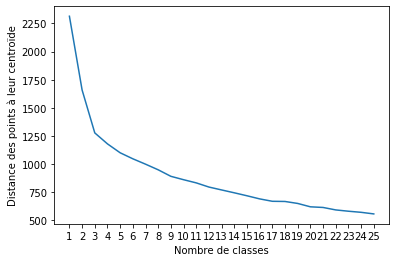

In [5]:
# Représentation graphique : 
import matplotlib.pyplot as plt

plt.plot(range(1, 26), somme_distance)
plt.xlabel("Nombre de classes")
plt.ylabel("Distance des points à leur centroïde")
plt.xticks(ticks=range(1, 26))
plt.show()

On choisit le nombre de classes au niveau du "coude" de la courbe

## Limites des k-means

La grande limite des k-means est sans doute que cet algorithme nécessite un choix a priori du nombre de classes. Il existe certes des outils comme le graphique que l'on vient de faire pour orienter notre décision mais il ne reflètera pas forcément la qualité de notre clustering.  

Un bon exemple de cette limite peut s'illustrer avec les données suivantes : 

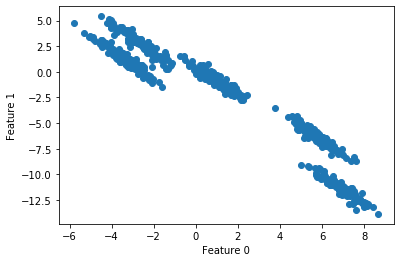

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

__Exercice__ :  
Choisissez le nombre de classes visuellement et avec le graphique de l'évolution de l'inertie. Les deux manières correspondent-elles?  
Représentez graphiquement la classification obtenue avec l'algorithme des k-means.   

-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  

__Correction__

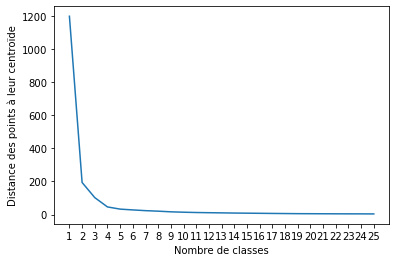

In [19]:
# on centre les données  
X_cr = StandardScaler().fit_transform(X)

# graphique en fonction du nombre de classes : 
somme_distance = [KMeans(n_clusters=k).fit(X_cr).inertia_ for k in range(1, 26)]
plt.plot(range(1, 26), somme_distance)
plt.xlabel("Nombre de classes")
plt.ylabel("Distance des points à leur centroïde")
plt.xticks(ticks=range(1, 26))
plt.show()


Visuellement on aurait dit 5 classes mais le graphique suggère plutôt 4.  On peut faire les 2 :  

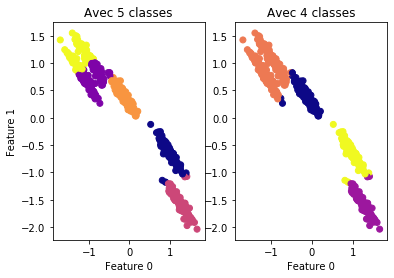

In [20]:
# 5 classes
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_cr)
classes_5 = kmeans.predict(X_cr)

# 4 classes
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_cr)
classes_4 = kmeans.predict(X_cr)

# on fait les plots 
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(X_cr[:, 0], X_cr[:, 1], c=classes_5, cmap="plasma")
ax1.set_xlabel("Feature 0")
ax1.set_ylabel("Feature 1")
ax1.set_title("Avec 5 classes")

ax2.scatter(X_cr[:, 0], X_cr[:, 1], c=classes_4, cmap="plasma")
ax2.set_xlabel("Feature 0")
ax2.set_title("Avec 4 classes")
plt.show()

# DBSCAN 

Le clustering avec DBSCAN suit une logique différente de celles des k-means. Cette fois, l'algorithme va parcourir les points un par un et compter le nombre de points voisins en fonction d'une distance epsilon que l'on aura paramétrée. Le point sera alors considéré comme :  
- un core point si son voisinage proche (< epsilon) contient au moins k points (k est à paramétrer)  
- un border point si son voisinage proche contient moins de k points mais qu'il se trouve dans le voisinage proche d'un point (k différent de 0).  
- un bruit (noise) s'il n'est ni un core point ni un border point.  

Les points d'une même classe sont donc tous ceux pouvant être reliés par des core points communs. L'algorithme fonctionne donc de la manière suivante :  
- Il s'initialise sur un point, s'il détermine que c'est un core point il continue à déterminer l'ensemble des points de son voisinage jusquèà qu'il tombe sur un point qui n'a pas le minimum requis de voisins (border point ou noise).  
- Il passe à un autre point qui n'a pas été visité et continue.  

À noter : Un point peut être considéré comme un bruit dans un premier temps puis redéfini comme un border point si un point visité à son voisingae s'avère être un core point.

## Différences avec k-means

Ici l'algorithme ne cherche pas à catégoriser les données en un nombre de classes défini mais à mettre en évidence des zones de densité de points. C'est l'algorithme lui-même qui va définir un nombre de classes en fonction du nombre de zones denses qu'il aura parcourues. De plus, certains points peuvent ne pas être classés (les bruits).   
Le gros avantage de cet algorithme est donc qu'il ne présuppose pas a priori la forme de la relation entre les points d'une classe mais met en évidence un certain nombre de zones denses.  
Là encore une vidéo peut rendre tout ça  plus clair : 

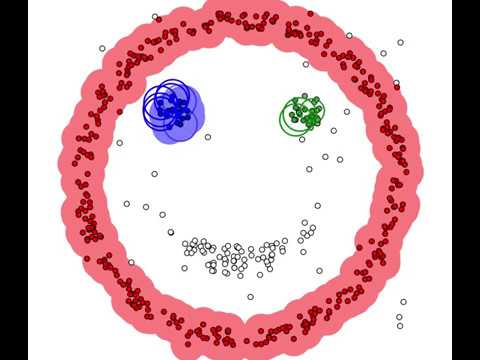

In [8]:
from IPython.display import YouTubeVideo

YouTubeVideo('h53WMIImUuc', width=800, height=300)

## Implémentation sous python

La fonction `DBSCAN` est disponible dans scikit learn : 


In [21]:
from sklearn.cluster import DBSCAN

Les deux paramètres à déterminer sont `min_sample`, le nombre de points minimum à trouver au voisinage d'un point pour qu'il soit considéré comme un core-point, et `eps` la distance en dessous de laquel on considère qu'un point est au voisinage d'un autre.

__Exercice__  
- Faites un DBSCAN sur les données précédentes sur lesquelles le k-means ne fonctionnait pas correctement.  
- Représentez graphiquement les résultats en faisant à chaque fois varier `min_sample` et `eps`. Arrivez-vous à trouver un paramétrage qui permette de retrouver les 5 classes que l'on voit visuellement?  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
-  
__Correction__ : 

In [25]:
j = 0.1
i = 2
db = DBSCAN(eps=j, min_samples = i)
predict_db = db.fit_predict(X_cr)
db.labels_

array([ 0,  1,  2, -1,  1,  0,  1,  3,  1,  4,  0,  4,  2,  4,  2,  2,  3,
        3,  4,  1,  0,  3,  2,  2,  3,  4,  2,  1,  3,  4,  0,  1,  0,  2,
        2,  1,  1,  2,  3,  4,  1,  0,  3,  2,  4,  3,  1,  1,  3,  2,  3,
        2,  3,  1,  0,  1,  4,  0,  4,  1,  1,  4,  4,  0,  1,  4,  4,  4,
        0,  0,  2,  3,  1,  2,  0,  0,  2,  2,  0,  4,  0,  1,  0,  1,  0,
        3,  1,  0,  3,  4,  4,  2,  3,  1,  1,  3,  1,  3,  1,  3,  1,  0,
        3,  3,  1,  2,  4,  2,  1,  3,  4,  3,  3,  3,  3,  3,  2,  0,  3,
        0,  1,  2,  2,  4,  4,  1,  0,  2,  3,  2,  3,  2,  3,  3,  4,  3,
        2,  0,  4,  3,  0,  3,  2,  4,  2,  3,  1,  1,  2,  2,  1,  4,  1,
        4,  2,  3,  2,  4,  0,  1,  4,  3,  0,  3,  1,  2,  2,  3,  0,  2,
        0,  0,  3, -1,  0,  1,  2,  3,  0,  0,  1,  3,  0,  3,  0,  1,  4,
        3,  0,  0,  3,  1,  0,  1,  0,  0,  0,  0,  2,  0,  0,  3,  2,  0,
        3,  3,  4,  4,  3,  4,  4,  2,  2,  3,  4,  1,  0,  4,  3,  4,  3,
        0,  0,  1,  3,  4

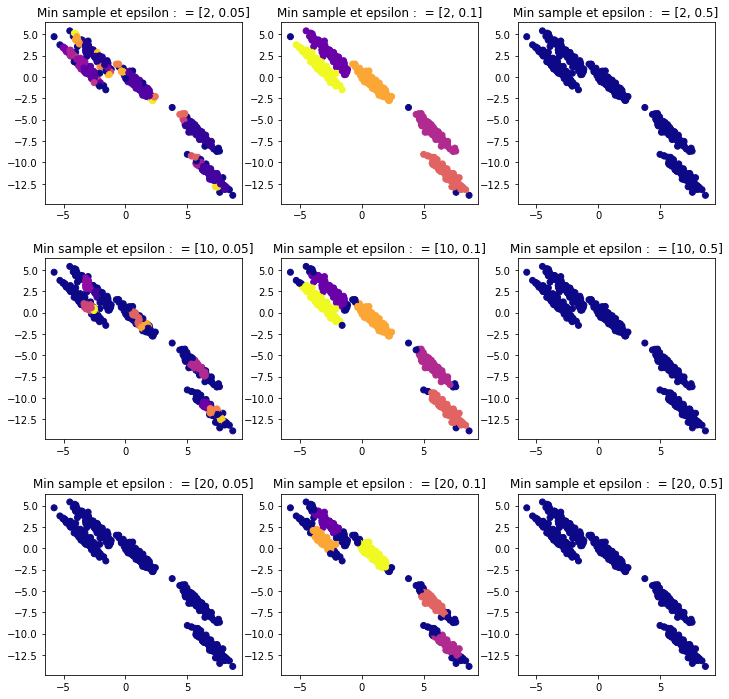

In [139]:
fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace = 0.3)

# on initialise des listes vides où mettre nos résultats
predict_DB = []
list_eps_minsamp = []

# On fait DBSCAN pour les différentes combinaisons de eps et min_samples
for i in [2, 10, 20]:
    for j in [0.05, 0.1, 0.5]:
        db = DBSCAN(eps=j, min_samples = i).fit_predict(X_cr)
        predict_DB.append(db)
        list_eps_minsamp.append([i, j])


# on représente graphiquement le résultat
for i in range(len(predict_DB)):
    ax = fig.add_subplot(3,3,i+1)
    ax.scatter(X[:, 0], X[:, 1], c=predict_DB[i], cmap="plasma")
    ax.set_title(f"Min sample et epsilon :  = {list_eps_minsamp[i]}")

plt.show()



__Attention__ : Pour min_sample = 20, les résultats à epsilon = 0.05 et epsilon à 0.5 n'ont pas du tout le même sens : 

In [146]:
predict_DB[6][range(100)]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [147]:
predict_DB[8][range(100)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Sources
Un article très intéressant sur DBSCAN et k-means sur lequel je m'appuie pour certaines exemples : https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

## Cas pratique 1 : classification des fromages  
- Importez la base carac_fromages.txt et affichez quelques stats descriptives sur ses variables   




On cherche à voir si certains fromages sont plus proches que d'autres en fonction de leurs caractéristiques.  

- Transformez les variables numériques de manière à pouvoir mener une analyse en k-means.  
- Justifiez un choix de nombre de classes avec cette méthode et opérez le clustering de ces données.  
- Observez les noms des fromages d'une même classe. Trouvez-vous logique qu'ils soient associés?  
- Faites une classification avec DBSCAN et comparez les résultats. 